In [2]:
import pandas as pd  
import numpy as np  # For numerical operations
import scipy.stats  # For statistical functions, such as Pearson's correlation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import weeather data
weather = pd.read_csv('weather.csv')
display(weather.head())
weather.info()
weather.describe()
weather.isna().sum()
weather['Date'].value_counts()

Date  Minimum temperature (°C)  Maximum temperature (°C)  \
0  1/01/2023                      18.4                      35.9   
1  2/01/2023                      22.1                      32.0   
2  3/01/2023                      15.2                      21.1   
3  4/01/2023                      15.0                      18.7   
4  5/01/2023                      14.1                      21.6   

   Rainfall (mm)  Evaporation (mm)  Sunshine (hours)  \
0            0.0               7.4              13.5   
1            6.4              13.4               9.3   
2            0.2               8.8               4.0   
3            0.0               6.0               0.0   
4            1.0               3.2               9.2   

   Speed of maximum wind gust (km/h) Time of maximum wind gust  \
0                                 31                     12:47   
1                                 52                      8:16   
2                                 37                     18:34   
3                                 52                     15:31   
4                                 39                     12:00   

   9am Temperature (°C)  9am relative humidity (%)  9am cloud amount (oktas)  \
0                  24.6                         65                       1.0   
1                  28.6                         47                       7.0   
2                  17.4                         68                       8.0   
3                  15.6                         62                       7.0   
4                  18.4                         66                       1.0   

   9am wind speed (km/h)  9am MSL pressure (hPa)  3pm Temperature (°C)  \
0                      7                  1010.8                  35.3   
1                     22                  1005.9                  21.1   
2                     11                  1010.2                  20.5   
3                     13                  1010.7                  16.0   
4                     13                  1014.9                  20.8   

   3pm relative humidity (%)  3pm cloud amount (oktas)  3pm wind speed (km/h)  \
0                         34                         7                     11   
1                         80                         6                     13   
2                         58                         7                     17   
3                         76                         7                     22   
4                         65                         5                     15   

   3pm MSL pressure (hPa)  
0                  1007.4  
1                  1006.6  
2                  1008.9  
3                  1011.2  
4                  1014.3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               181 non-null    object 
 1   Minimum temperature (°C)           181 non-null    float64
 2   Maximum temperature (°C)           181 non-null    float64
 3   Rainfall (mm)                      181 non-null    float64
 4   Evaporation (mm)                   181 non-null    float64
 5   Sunshine (hours)                   181 non-null    float64
 6   Speed of maximum wind gust (km/h)  181 non-null    int64  
 7   Time of maximum wind gust          181 non-null    object 
 8   9am Temperature (°C)               181 non-null    float64
 9   9am relative humidity (%)          181 non-null    int64  
 10  9am cloud amount (oktas)           180 non-null    float64
 11  9am wind speed (km/h)              181 non-null    int64  

1/01/2023     1
25/04/2023    1
27/04/2023    1
28/04/2023    1
29/04/2023    1
             ..
4/03/2023     1
5/03/2023     1
6/03/2023     1
7/03/2023     1
30/06/2023    1
Name: Date, Length: 181, dtype: int64

In [4]:
weather['Date'] = pd.to_datetime(weather['Date'], dayfirst=True)

In [5]:
#import safety_cat data
safety_cat = pd.read_csv('safety_cat0.csv')
display(safety_cat.head())
safety_cat.info()
safety_cat.describe()
safety_cat.isna().sum()
safety_cat['Date'].value_counts()


Date  Personal security  Security  Safety  Safe working  \
0  1/01/2023                 10        10       3             4   
1  2/01/2023                 18         5       1             0   
2  3/01/2023                 11         8       6             3   
3  4/01/2023                 14        11       4             3   
4  5/01/2023                 24        22       4             4   

   Track and civil  Signal Passed at Danger  Construction / works damage  \
0                1                        3                            0   
1                0                        1                            0   
2                0                        0                            2   
3                0                        1                            0   
4                1                        3                            0   

   Rolling stock  Collision (near miss)  Environmental  Collision  Electrical  \
0              0                      1              0          0           0   
1              0                      0              0          0           1   
2              1                      1              0          0           0   
3              0                      0              0          0           0   
4              0                      0              0          0           2   

   Derailment  
0           0  
1           0  
2           0  
3           0  
4           0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         181 non-null    object
 1   Personal security            181 non-null    int64 
 2   Security                     181 non-null    int64 
 3   Safety                       181 non-null    int64 
 4   Safe working                 181 non-null    int64 
 5   Track and civil              181 non-null    int64 
 6   Signal Passed at Danger      181 non-null    int64 
 7   Construction / works damage  181 non-null    int64 
 8   Rolling stock                181 non-null    int64 
 9   Collision (near miss)        181 non-null    int64 
 10  Environmental                181 non-null    int64 
 11  Collision                    181 non-null    int64 
 12  Electrical                   181 non-null    int64 
 13  Derailment                   181 no

1/01/2023     1
25/04/2023    1
27/04/2023    1
28/04/2023    1
29/04/2023    1
             ..
4/03/2023     1
5/03/2023     1
6/03/2023     1
7/03/2023     1
30/06/2023    1
Name: Date, Length: 181, dtype: int64

In [6]:
safety_cat['Date'] = pd.to_datetime(safety_cat['Date'],dayfirst=True)

In [26]:
merged_sc_weather = pd.merge(safety_cat, weather, on='Date')

# Identify the numeric columns in the merged_data_daily_weather dataframe
numeric_columns_sc_weather = merged_sc_weather.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix_sc_weather = merged_sc_weather[numeric_columns_sc_weather].corr()

# Calculate absolute values of correlations
correlation_sc_abs = correlation_matrix_sc_weather.abs()


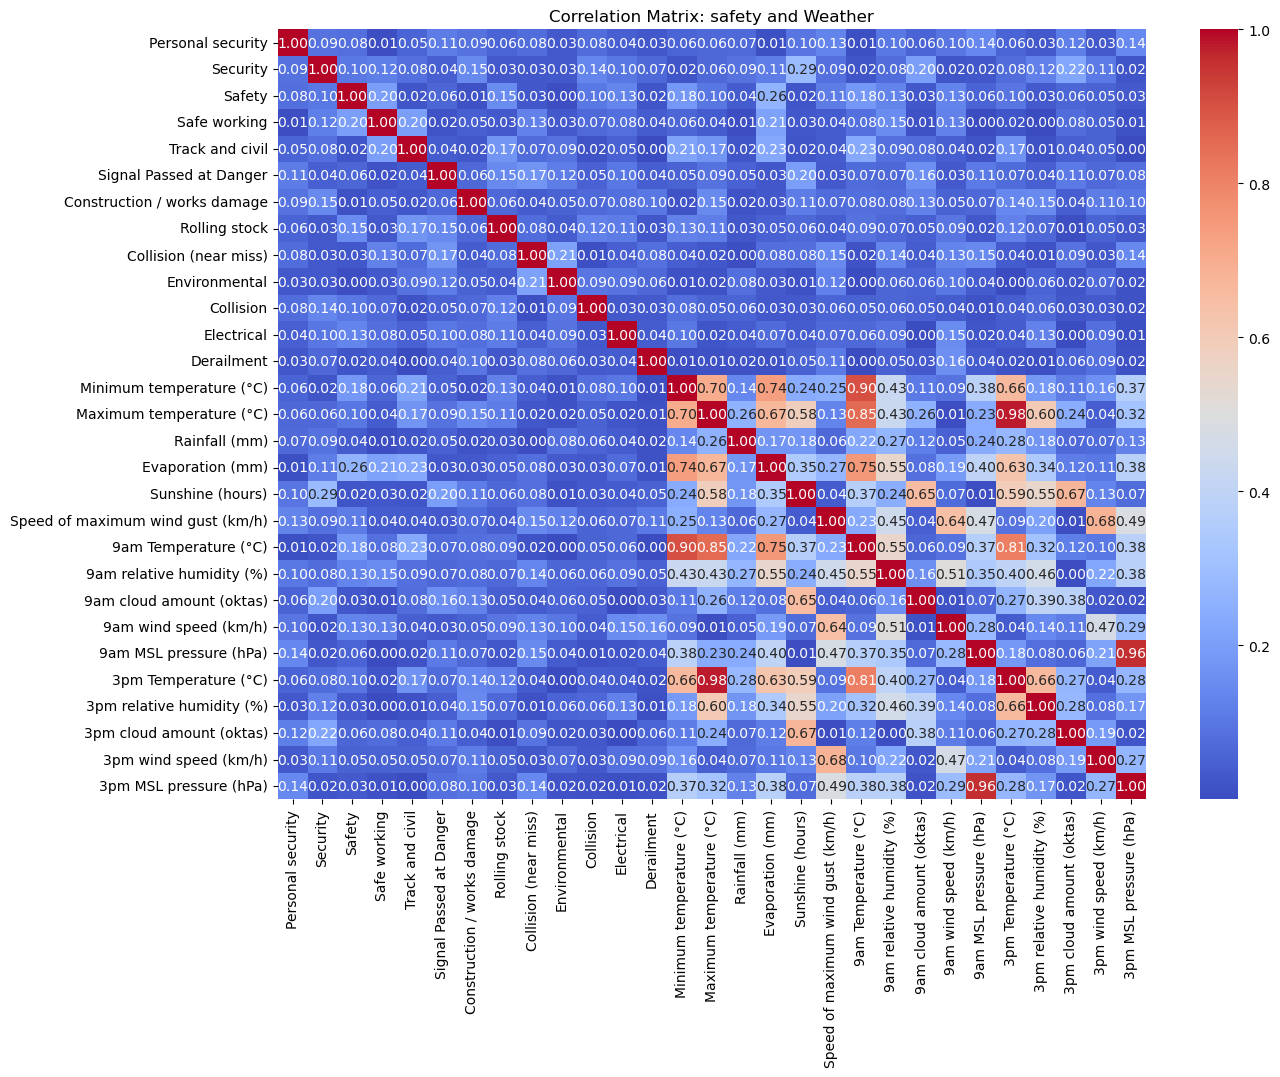

In [27]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_sc_abs, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: safety and Weather')
plt.show()

the 3 most corralated to weather safety catelogories: 'Security','Safety','Track and civil'

In [42]:
#import safety_cat1 As category1 under category 'safety'
safety_cat1 = pd.read_csv('safety_cat1.csv')
display(safety_cat1.head())
safety_cat1.info()
safety_cat1.describe()
safety_cat1.isna().sum()
safety_cat1['Date'].value_counts()

Date  Asbestos / Hazardous material  Caught in rolling stock doors  \
0  1/01/2023                              0                              0   
1  2/01/2023                              0                              0   
2  3/01/2023                              0                              0   
3  4/01/2023                              0                              1   
4  5/01/2023                              0                              1   

   Duty of care  Parent / Child separation  Slip, trip or fall  \
0             3                          0                   0   
1             1                          0                   0   
2             3                          0                   3   
3             2                          0                   0   
4             2                          0                   1   

   Struck by object  Trapped in lift  
0                 0                0  
1                 0                0  
2                 0                0  
3                 1                0  
4                 0                0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Date                           181 non-null    object
 1   Asbestos / Hazardous material  181 non-null    int64 
 2   Caught in rolling stock doors  181 non-null    int64 
 3   Duty of care                   181 non-null    int64 
 4   Parent / Child separation      181 non-null    int64 
 5   Slip, trip or fall             181 non-null    int64 
 6   Struck by object               181 non-null    int64 
 7   Trapped in lift                181 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 11.4+ KB


1/01/2023     1
25/04/2023    1
27/04/2023    1
28/04/2023    1
29/04/2023    1
             ..
4/03/2023     1
5/03/2023     1
6/03/2023     1
7/03/2023     1
30/06/2023    1
Name: Date, Length: 181, dtype: int64

In [43]:
#import safety_cat1 As category1 under category 'Secrurity'
safety_cat2 = pd.read_csv('safety_cat2.csv')
display(safety_cat2.head())
safety_cat2.info()
safety_cat2.describe()
safety_cat2.isna().sum()
safety_cat2['Date'].value_counts()

Date  Damage / Interference / Vandalism  Fare evasion  Fire  Graffiti  \
0  1/01/2023                                  4             0     0         2   
1  2/01/2023                                  1             0     0         3   
2  3/01/2023                                  2             0     0         3   
3  4/01/2023                                  3             0     0         4   
4  5/01/2023                                  3             2     0         8   

   Injury or illness  Offender decamped  Resisting arrest  \
0                  1                  2                 0   
1                  1                  0                 0   
2                  1                  2                 0   
3                  4                  0                 0   
4                  4                  1                 0   

   Security Breach (includes cyber security)  Suspicious Behaviour / Sabotage  \
0                                          1                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                2   

   Suspicious Package(s)  Terrorism / Sabotage  Theft  
0                      0                     0      0  
1                      0                     0      0  
2                      0                     0      0  
3                      0                     0      0  
4                      0                     0      2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Date                                       181 non-null    object
 1   Damage / Interference / Vandalism          181 non-null    int64 
 2   Fare evasion                               181 non-null    int64 
 3   Fire                                       181 non-null    int64 
 4   Graffiti                                   181 non-null    int64 
 5   Injury or illness                          181 non-null    int64 
 6   Offender decamped                          181 non-null    int64 
 7   Resisting arrest                           181 non-null    int64 
 8   Security Breach (includes cyber security)  181 non-null    int64 
 9   Suspicious Behaviour / Sabotage            181 non-null    int64 
 10  Suspicious Package(s)                 

1/01/2023     1
25/04/2023    1
27/04/2023    1
28/04/2023    1
29/04/2023    1
             ..
4/03/2023     1
5/03/2023     1
6/03/2023     1
7/03/2023     1
30/06/2023    1
Name: Date, Length: 181, dtype: int64

In [44]:
#import safety_cat1 As category1 under category 'track and civil'
safety_cat3 = pd.read_csv('safety_cat3.csv')
display(safety_cat3.head())
safety_cat3.info()
safety_cat3.describe()
safety_cat3.isna().sum()
safety_cat3['Date'].value_counts()

Date  Bridge Strike  Broken Rail  Comms system failure  \
0   1/01/2023              0            0                     0   
1   5/01/2023              0            0                     0   
2   8/01/2023              0            0                     1   
3  11/01/2023              0            1                     0   
4  13/01/2023              0            0                     0   

   Level crossing equipment failure  Misaligned Track  Obstruction  \
0                                 1                 0            0   
1                                 0                 0            0   
2                                 0                 0            0   
3                                 0                 0            0   
4                                 1                 0            0   

   Other Irregularity  Overhead Structure Asset Damage  \
0                   0                                0   
1                   0                                0   
2                   0                                0   
3                   0                                0   
4                   0                                0   

   Overhead Wiring Asset Damage  Points Irregularity  \
0                             0                    0   
1                             1                    0   
2                             0                    0   
3                             0                    0   
4                             0                    0   

   Signalling / Proceed Authority System Irregularity  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Train Warning / Enforcement System Irregularity  Underground Asset Damage  
0                                                0                         0  
1                                                0                         0  
2                                                0                         1  
3                                                0                         0  
4                                                0                         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Date                                                86 non-null     object
 1   Bridge Strike                                       86 non-null     int64 
 2   Broken Rail                                         86 non-null     int64 
 3   Comms system failure                                86 non-null     int64 
 4   Level crossing equipment failure                    86 non-null     int64 
 5   Misaligned Track                                    86 non-null     int64 
 6   Obstruction                                         86 non-null     int64 
 7   Other Irregularity                                  86 non-null     int64 
 8   Overhead Structure Asset Damage                     86 non-null     int64 
 9   Overhead Wir

1/01/2023     1
7/05/2023     1
24/05/2023    1
22/05/2023    1
20/05/2023    1
             ..
14/03/2023    1
11/03/2023    1
8/03/2023     1
1/03/2023     1
30/06/2023    1
Name: Date, Length: 86, dtype: int64

In [45]:
safety_cat1['Date'] = pd.to_datetime(safety_cat1['Date'],dayfirst=True)

In [46]:
merged_sc1_weather = pd.merge(safety_cat1, weather, on='Date')

# Identify the numeric columns in the merged_data_daily_weather dataframe
numeric_columns_sc1_weather = merged_sc1_weather.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix_sc1_weather = merged_sc1_weather[numeric_columns_sc1_weather].corr()

# Calculate absolute values of correlations
correlation_sc1_abs = correlation_matrix_sc1_weather.abs()


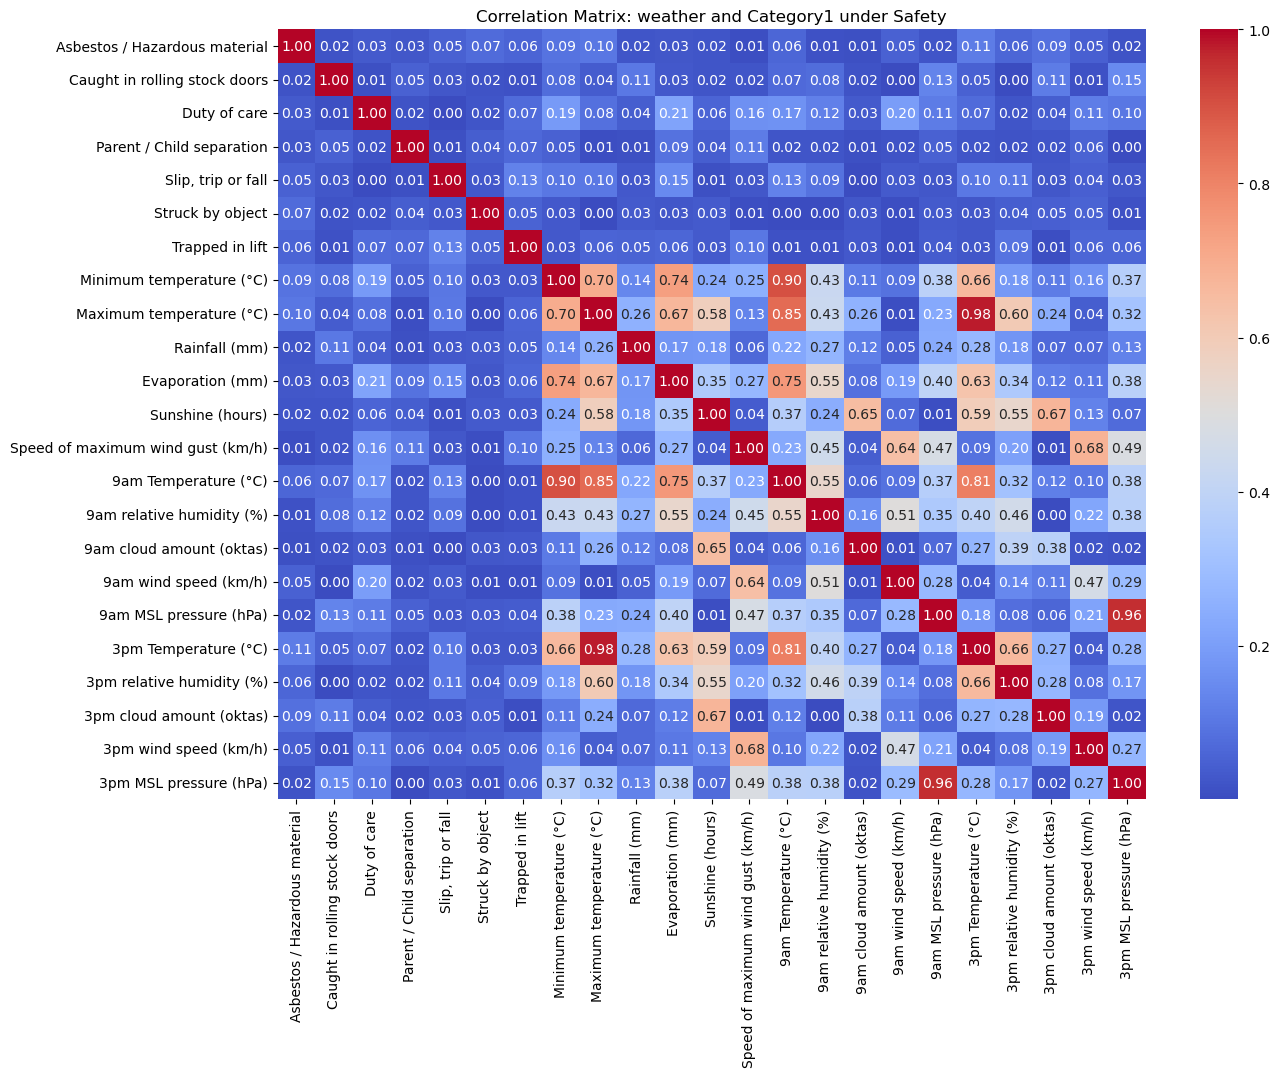

In [47]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_sc1_abs, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: weather and Category1 under Safety')
plt.show()

In [48]:
safety_cat2['Date'] = pd.to_datetime(safety_cat2['Date'],dayfirst=True)

In [37]:
merged_sc2_weather = pd.merge(safety_cat2, weather, on='Date')

# Identify the numeric columns in the merged_data_daily_weather dataframe
numeric_columns_sc2_weather = merged_sc2_weather.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix_sc2_weather = merged_sc2_weather[numeric_columns_sc2_weather].corr()

# Calculate absolute values of correlations
correlation_sc2_abs = correlation_matrix_sc2_weather.abs()


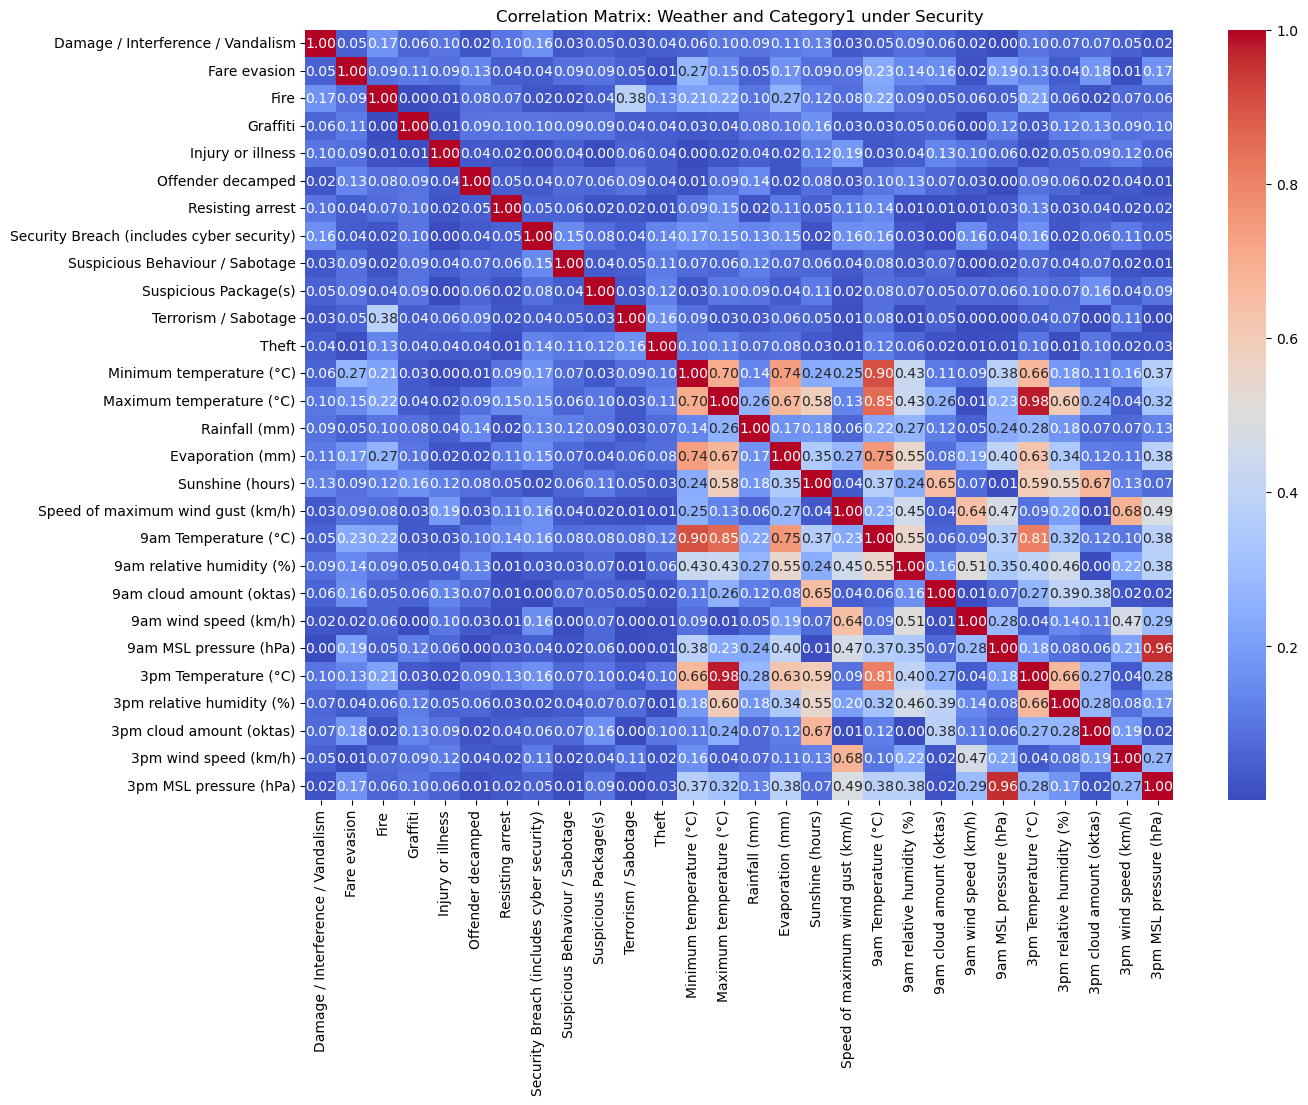

In [52]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_sc2_abs, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: Weather and Category1 under Security')
plt.show()

In [39]:
safety_cat3['Date'] = pd.to_datetime(safety_cat3['Date'],dayfirst=True)

In [40]:
merged_sc3_weather = pd.merge(safety_cat3, weather, on='Date')

# Identify the numeric columns in the merged_data_daily_weather dataframe
numeric_columns_sc3_weather = merged_sc3_weather.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix_sc3_weather = merged_sc3_weather[numeric_columns_sc3_weather].corr()

# Calculate absolute values of correlations
correlation_sc3_abs = correlation_matrix_sc3_weather.abs()

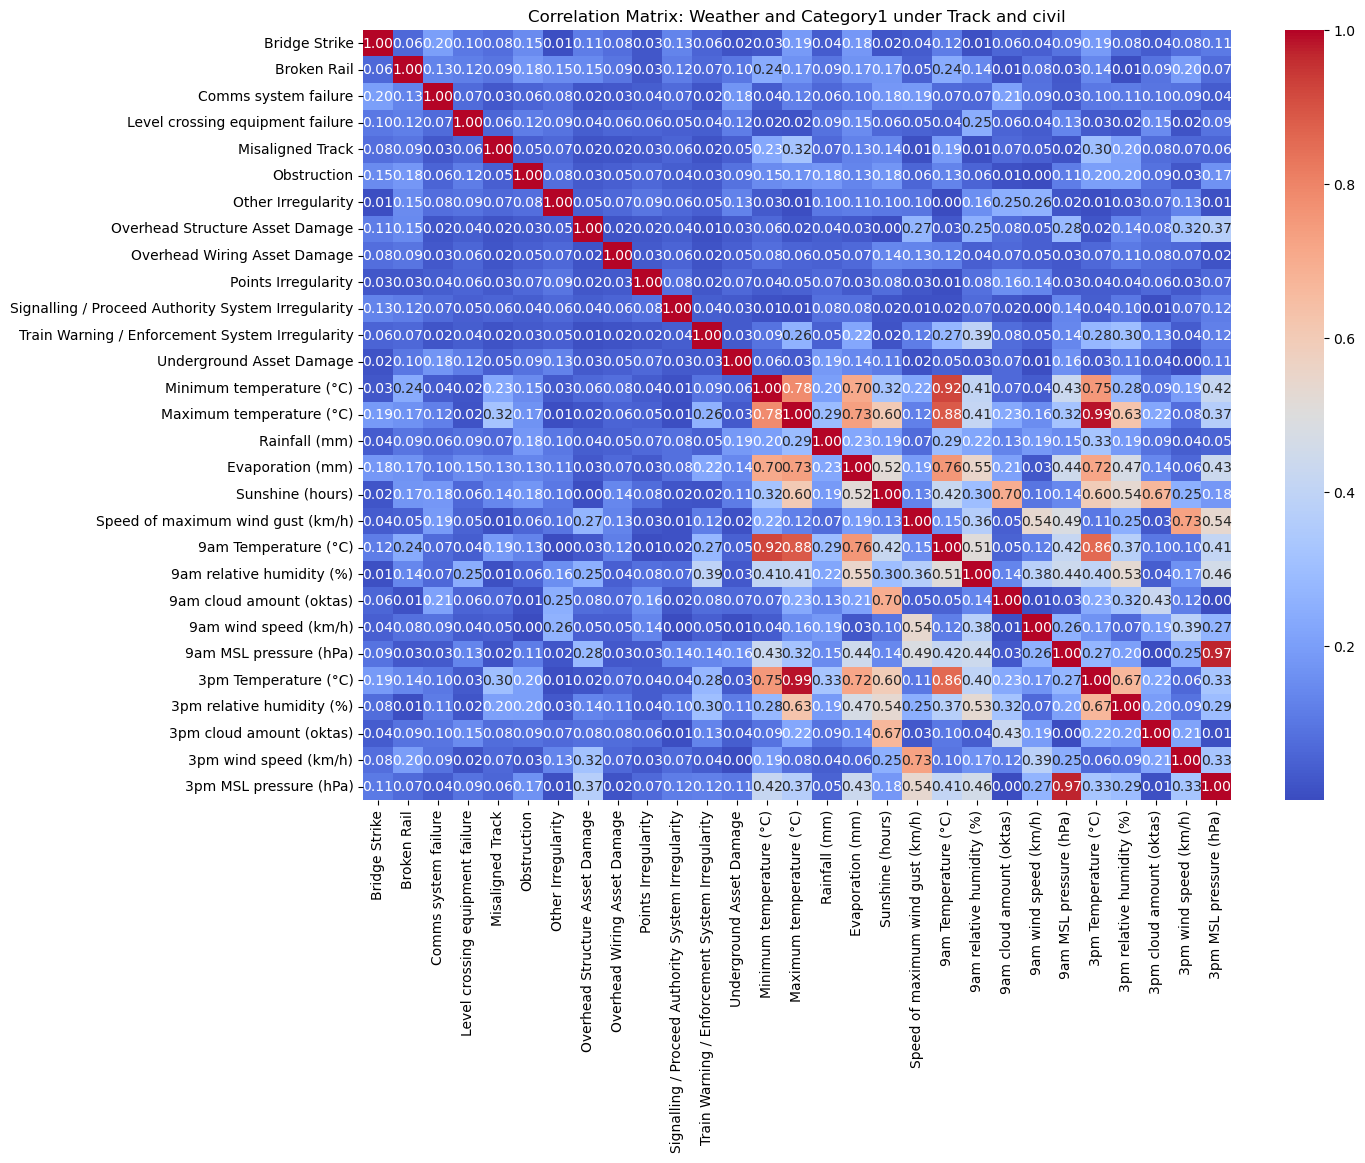

In [53]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_sc3_abs, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: Weather and Category1 under Track and civil')
plt.show()